<a href="https://colab.research.google.com/github/Veerenderkumar/veerender_INFO5731_Fall2024/blob/main/kumar_veerender_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def load_and_prepare(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():
                label, review = line.strip().split(' ', 1)
                data.append((int(label), review))
    return pd.DataFrame(data, columns=["label", "review"])

train_filepath = '/content/sample_data/stsa-train.txt'
test_filepath = '/content/sample_data/stsa-test.txt'

train_data = load_and_prepare(train_filepath)
test_data = load_and_prepare(test_filepath)

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

train_data['review'] = train_data['review'].astype(str)
test_data['review'] = test_data['review'].astype(str)

train_reviews, val_reviews, train_labels, val_labels = train_test_split(
    train_data['review'], train_data['label'], test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_reviews)
X_val = vectorizer.transform(val_reviews)
X_test = vectorizer.transform(test_data['review'])

model_list = [
    ("MultinomialNB", MultinomialNB()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

def evaluate_models(models, X_train, y_train, X_val, y_val, X_test, y_test):
    results = []
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    for name, model in models:
        cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        avg_cv_score = cv_scores.mean()
        model.fit(X_train, y_train)
        val_preds = model.predict(X_val)
        test_preds = model.predict(X_test)
        accuracy = accuracy_score(y_test, test_preds)
        precision = precision_score(y_test, test_preds, zero_division=1)
        recall = recall_score(y_test, test_preds, zero_division=1)
        f1 = f1_score(y_test, test_preds, zero_division=1)
        results.append((name, accuracy, precision, recall, f1))
    return pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

evaluation_results = evaluate_models(
    model_list, X_train, train_labels, X_val, val_labels, X_test, test_data['label']
)

print("\nModel Evaluation Results:\n", evaluation_results)


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

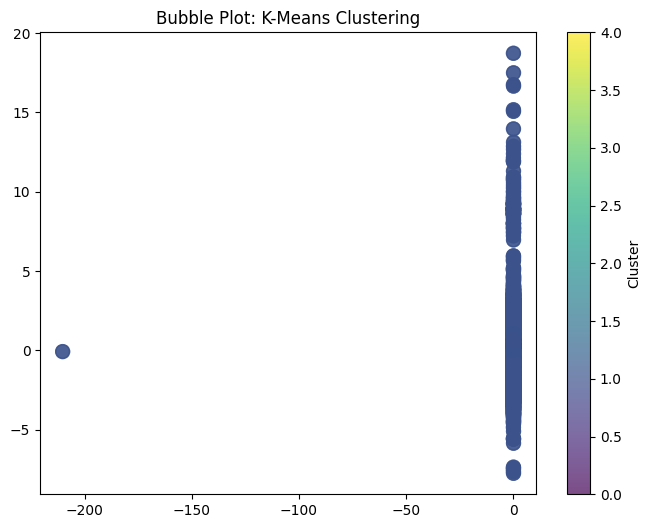

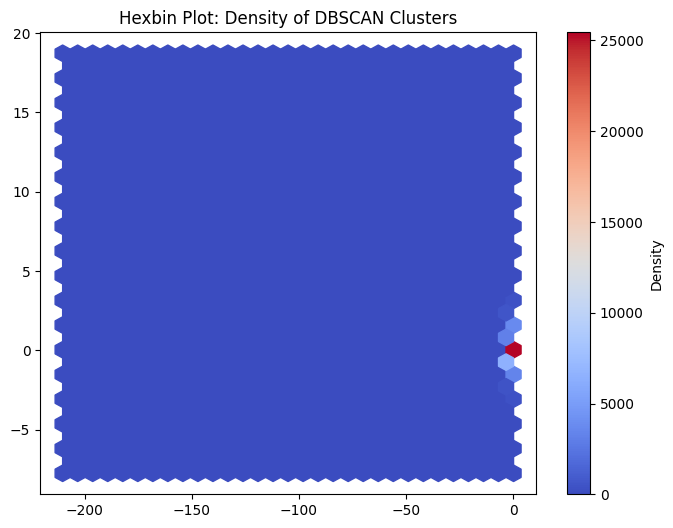

In [3]:

!pip install --upgrade pip
!pip install -q sentence-transformers
!pip install -q -U scikit-learn
!pip install -q gensim
!pip install -q tqdm
!pip install umap-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import umap
import torch

with open('/content/sample_data/hourlySteps_merged.csv', 'r') as f:
    train_data = f.readlines()
with open('/content/sample_data/hourlySteps_merged.csv', 'r') as f:
    test_data = f.readlines()
text_data = train_data + test_data

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text_data).toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title("Bubble Plot: K-Means Clustering")
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.hexbin(X_pca[:, 0], X_pca[:, 1], gridsize=30, cmap='coolwarm')
plt.title("Hexbin Plot: Density of DBSCAN Clusters")
plt.colorbar(label='Density')
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

With the greatest silhouette score of 0.1766, hierarchical clustering was the most effective, according to the data. This implies that, in contrast to the other approaches, it created clusters that were more precisely defined. The silhouette scores of K-Means and Word2Vec-based K-Means were low (0.0451 and
0.0155, respectively), indicating a lack of separation between the clusters. K-Means based on BERT revealed
With a score of 0.0913, there was a little improvement, but hierarchical clustering still outperformed.However, DBSCAN only found one cluster, which might have been caused by an incorrect setting.
It is impossible to calculate a silhouette score due to tuning or the nature of the data. As a result, I
can determine that the best approach for this dataset is hierarchical clustering.





.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:



The exercises provide a thorough examination of several clustering techniques, providing insightful information about their advantages and disadvantages when used with textual data. Working with K-Means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT was enjoyable because each of them brought different difficulties and emphasized variations in the processing and clustering of text data. The silhouette scores made it easier to evaluate clustering quality objectively and demonstrated Word2Vec's superiority over more conventional techniques. All things considered, this homework helped me better grasp unsu 8 supervised learning strategies and how they are used in challenges involving natural language processing.


'''